# Data Dictionary
Base on the dictionary described in that file: data/input/data_dictionary_trip_records_green.pdf (or in that link https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

## VendorID
A code indicating the LPEP provider that provided the record. 
- 1= Creative Mobile Technologies, LLC; 
- 2= VeriFone Inc.

## lpep_pickup_datetime
The date and time when the meter was engaged. 

## Lpep_dropoff_datetime
The date and time when the meter was disengaged. 

## Store_and_fwd_flag
This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
- Y= store and forward trip
- N= not a store and forward trip

## RateCodeID
The final rate code in effect at the end of the trip.
- 1= Standard rate
- 2=JFK
- 3=Newark
- 4=Nassau or Westchester
- 5=Negotiated fare
- 6=Group ride

## Pickup_longitude
(Not sure) The longitude in which the taximeter was engaged

## Pickup_latitude
(Not sure) The latitude in which the taximeter was engaged

## Dropoff_longitude
(Not sure) The longitude in which the taximeter was disengaged

## Dropoff_latitude
(Not sure) The latitude in which the taximeter was disengaged

## Passenger_count
The number of passengers in the vehicle.
This is a driver-entered value.

## Trip_distance
The elapsed trip distance in miles reported by the taximeter.

## Fare_amount
The time-and-distance fare calculated by the meter.

## Extra
Miscellaneous extras and surcharges. Currently, this only includes
the 0.50USD and 1USD rush hour and overnight charges.

## MTA_tax
0.50USD MTA tax that is automatically triggered based on the metered
rate in use.

## Tip_amount
Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

## Tolls_amount
Total amount of all tolls paid in trip. 

## Ehail_fee
(Not understand)
- 0.0= Unknown

## Total_amount
The total amount charged to passengers. Does not include cash tips.

## Payment_type
A numeric code signifying how the passenger paid for the trip.
- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided trip

## Trip_type
A code indicating whether the trip was a street-hail or a dispatch
that is automatically assigned based on the metered rate in use but
can be altered by the driver.
- 0= Unknown
- 1= Street-hail
- 2= Dispatch

## Pickup_hour_{hour_index: 0-23}
One-Hot encoding for each hour of the day, based on the lpep_pickup_datetime.

## Dropoff_hour_{hour_index: 0-23}
One-Hot encoding for each hour of the day, based on the Lpep_dropoff_datetime.

## Pickup_weekday_{weekday_index: 0-6 ~ Monday-Sunday}
One-Hot encoding for each day of the week, based on the lpep_pickup_datetime.

## Dropoff_weekday_{weekday_index: 0-6 ~ Monday-Sunday}
One-Hot encoding for each day of the week, based on the Lpep_dropoff_datetime.

## Trip_duration
The elapsed trip duration in seconds calculated by the different between the Lpep_dropoff_datetime and the lpep_pickup_datetime.

## Is_at_JFK_airport
An int encoding to indicate if the pickup or dropoff locations were at JFK airport.

# Data Extraction

In [1]:
import pandas as pd

FILENAME = 'green_tripdata_2013-09'

df = pd.read_csv('data/input/%s.csv' %(FILENAME, ), index_col=False)
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
0,2,2013-09-01 00:02:00,2013-09-01 00:54:51,N,1,-73.952408,40.810726,-73.983940,40.676285,5,14.35,50.5,0.5,0.5,10.30,0.00,NaN,61.80,1,NaN
1,2,2013-09-01 00:02:34,2013-09-01 00:20:59,N,1,-73.963020,40.711834,-73.966644,40.681690,1,3.24,15.0,0.5,0.5,0.00,0.00,NaN,16.00,2,NaN
2,2,2013-09-01 00:03:06,2013-09-01 00:28:03,N,1,-73.843460,40.755951,-73.989212,40.740528,1,11.27,34.0,0.5,0.5,8.07,5.33,NaN,48.40,1,NaN
3,2,2013-09-01 00:03:30,2013-09-01 00:23:02,N,1,-73.924812,40.754246,-73.978737,40.721504,1,6.63,22.0,0.5,0.5,5.75,0.00,NaN,28.75,1,NaN
4,2,2013-09-01 00:05:12,2013-09-01 00:30:55,N,1,-73.929504,40.756451,-73.856743,40.697037,1,12.84,37.0,0.5,0.5,0.00,0.00,NaN,38.00,1,NaN


# Data Transformation

In [2]:
print(df.count())
print()
print(df.dtypes)

VendorID                 49647
lpep_pickup_datetime     49647
Lpep_dropoff_datetime    49647
Store_and_fwd_flag       49647
RateCodeID               49647
Pickup_longitude         49647
Pickup_latitude          49647
Dropoff_longitude        49647
Dropoff_latitude         49647
Passenger_count          49647
Trip_distance            49647
Fare_amount              49647
Extra                    49647
MTA_tax                  49647
Tip_amount               49647
Tolls_amount             49647
Ehail_fee                    0
Total_amount             49647
Payment_type             49647
Trip_type                    3
dtype: int64

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Far

In [3]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['Lpep_dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'])
df['Ehail_fee'] = df['Ehail_fee'].fillna(0.0)
df['Trip_type'] = df['Trip_type '].fillna(0).astype(int)
df.drop(['Trip_type '], axis='columns', inplace=True)

print(df.count())
print()
print(df.dtypes)

VendorID                 49647
lpep_pickup_datetime     49647
Lpep_dropoff_datetime    49647
Store_and_fwd_flag       49647
RateCodeID               49647
Pickup_longitude         49647
Pickup_latitude          49647
Dropoff_longitude        49647
Dropoff_latitude         49647
Passenger_count          49647
Trip_distance            49647
Fare_amount              49647
Extra                    49647
MTA_tax                  49647
Tip_amount               49647
Tolls_amount             49647
Ehail_fee                49647
Total_amount             49647
Payment_type             49647
Trip_type                49647
dtype: int64

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passen

# Data Loading

In [4]:
import pyarrow as pa
import pyarrow.parquet as pq

table = pa.Table.from_pandas(df)
pq.write_table(table, 'data/output/%s.parquet' %(FILENAME, ), coerce_timestamps='ms')

# Unit Testing

In [5]:
parquet_file = pq.ParquetFile('data/output/%s.parquet' %(FILENAME, ))
parquet_file.metadata

  created_by: parquet-cpp version 1.5.1-SNAPSHOT
  num_columns: 20
  num_rows: 49647
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 11181

In [6]:
parquet_file.read_row_group(0)

pyarrow.Table
VendorID: int64
lpep_pickup_datetime: timestamp[ms]
Lpep_dropoff_datetime: timestamp[ms]
Store_and_fwd_flag: string
RateCodeID: int64
Pickup_longitude: double
Pickup_latitude: double
Dropoff_longitude: double
Dropoff_latitude: double
Passenger_count: int64
Trip_distance: double
Fare_amount: double
Extra: double
MTA_tax: double
Tip_amount: double
Tolls_amount: double
Ehail_fee: double
Total_amount: double
Payment_type: int64
Trip_type: int64

In [7]:
t = parquet_file.read_row_group(0)
t = t.to_pandas()
t.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
0,2,2013-09-01 00:02:00,2013-09-01 00:54:51,N,1,-73.952408,40.810726,-73.983940,40.676285,5,14.35,50.5,0.5,0.5,10.30,0.00,0.0,61.80,1,0
1,2,2013-09-01 00:02:34,2013-09-01 00:20:59,N,1,-73.963020,40.711834,-73.966644,40.681690,1,3.24,15.0,0.5,0.5,0.00,0.00,0.0,16.00,2,0
2,2,2013-09-01 00:03:06,2013-09-01 00:28:03,N,1,-73.843460,40.755951,-73.989212,40.740528,1,11.27,34.0,0.5,0.5,8.07,5.33,0.0,48.40,1,0
3,2,2013-09-01 00:03:30,2013-09-01 00:23:02,N,1,-73.924812,40.754246,-73.978737,40.721504,1,6.63,22.0,0.5,0.5,5.75,0.00,0.0,28.75,1,0
4,2,2013-09-01 00:05:12,2013-09-01 00:30:55,N,1,-73.929504,40.756451,-73.856743,40.697037,1,12.84,37.0,0.5,0.5,0.00,0.00,0.0,38.00,1,0


In [8]:
import random

TEST_RATIO = 0.1

n = t['VendorID'].count()
test_list = [i for i in range(n)]
random.shuffle(test_list)

test_list = test_list[:int(len(test_list) * TEST_RATIO)]

number_of_error = 0
for i in test_list:
    a, b = t.iloc[i], df.iloc[i]
    
    for (column_name, column_data) in a.iteritems():
        if column_data != b[column_name]:
            print('Test fail in %d row, %s column with data %s (after) and %s (before)' %(i, column_name, str(column_data), str(b[column_name])))
            number_of_error += 1

if number_of_error == 0:
    print('Test Success!')
else:
    print('Test Failure!')

Test Success!


# One-Hot encoding for each hour of the day

In [9]:
# pickup hour enconding
hour_encoding = pd.get_dummies(df['lpep_pickup_datetime'].dt.hour, prefix='Pickup_hour')
df = pd.concat([df, pd.DataFrame(hour_encoding, index=df.index)], axis=1)
# dropoff hour encoding
hour_encoding = pd.get_dummies(df['Lpep_dropoff_datetime'].dt.hour, prefix='Dropoff_hour')
df = pd.concat([df, pd.DataFrame(hour_encoding, index=df.index)], axis=1)
# test
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Dropoff_hour_14,Dropoff_hour_15,Dropoff_hour_16,Dropoff_hour_17,Dropoff_hour_18,Dropoff_hour_19,Dropoff_hour_20,Dropoff_hour_21,Dropoff_hour_22,Dropoff_hour_23
0,2,2013-09-01 00:02:00,2013-09-01 00:54:51,N,1,-73.952408,40.810726,-73.983940,40.676285,5,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-09-01 00:02:34,2013-09-01 00:20:59,N,1,-73.963020,40.711834,-73.966644,40.681690,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-09-01 00:03:06,2013-09-01 00:28:03,N,1,-73.843460,40.755951,-73.989212,40.740528,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2013-09-01 00:03:30,2013-09-01 00:23:02,N,1,-73.924812,40.754246,-73.978737,40.721504,1,...,0,0,0,0,0,0,0,0,0,0
4,2,2013-09-01 00:05:12,2013-09-01 00:30:55,N,1,-73.929504,40.756451,-73.856743,40.697037,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.iloc[22200][['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_hour_23', 'Dropoff_hour_0']]

lpep_pickup_datetime     2013-09-19 23:58:48
Lpep_dropoff_datetime    2013-09-20 00:13:06
Pickup_hour_23                             1
Dropoff_hour_0                             1
Name: 22200, dtype: object

# One-Hot encoding for each day	of the week

In [11]:
# pickup weekday encoding
weekday_encoding = pd.get_dummies(df['lpep_pickup_datetime'].dt.weekday, prefix='Pickup_weekday')
df = pd.concat([df, pd.DataFrame(weekday_encoding, index=df.index)], axis=1)
# dropoff weekday encoding
weekday_encoding = pd.get_dummies(df['Lpep_dropoff_datetime'].dt.weekday, prefix='Dropoff_weekday')
df = pd.concat([df, pd.DataFrame(weekday_encoding, index=df.index)], axis=1)
# test
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Dropoff_weekday_0,Dropoff_weekday_1,Dropoff_weekday_2,Dropoff_weekday_3,Dropoff_weekday_4,Dropoff_weekday_5,Dropoff_weekday_6
0,2,2013-09-01 00:02:00,2013-09-01 00:54:51,N,1,-73.952408,40.810726,-73.983940,40.676285,5,...,0,0,1,0,0,0,0,0,0,1
1,2,2013-09-01 00:02:34,2013-09-01 00:20:59,N,1,-73.963020,40.711834,-73.966644,40.681690,1,...,0,0,1,0,0,0,0,0,0,1
2,2,2013-09-01 00:03:06,2013-09-01 00:28:03,N,1,-73.843460,40.755951,-73.989212,40.740528,1,...,0,0,1,0,0,0,0,0,0,1
3,2,2013-09-01 00:03:30,2013-09-01 00:23:02,N,1,-73.924812,40.754246,-73.978737,40.721504,1,...,0,0,1,0,0,0,0,0,0,1
4,2,2013-09-01 00:05:12,2013-09-01 00:30:55,N,1,-73.929504,40.756451,-73.856743,40.697037,1,...,0,0,1,0,0,0,0,0,0,1


In [12]:
df.iloc[22200][['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_weekday_3', 'Dropoff_weekday_4']]

lpep_pickup_datetime     2013-09-19 23:58:48
Lpep_dropoff_datetime    2013-09-20 00:13:06
Pickup_weekday_3                           1
Dropoff_weekday_4                          1
Name: 22200, dtype: object

# Trip_duration

In [13]:
df['Trip_duration'] = (df['Lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).astype('timedelta64[s]').astype(int)
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Pickup_weekday_5,Pickup_weekday_6,Dropoff_weekday_0,Dropoff_weekday_1,Dropoff_weekday_2,Dropoff_weekday_3,Dropoff_weekday_4,Dropoff_weekday_5,Dropoff_weekday_6,Trip_duration
0,2,2013-09-01 00:02:00,2013-09-01 00:54:51,N,1,-73.952408,40.810726,-73.983940,40.676285,5,...,0,1,0,0,0,0,0,0,1,3171
1,2,2013-09-01 00:02:34,2013-09-01 00:20:59,N,1,-73.963020,40.711834,-73.966644,40.681690,1,...,0,1,0,0,0,0,0,0,1,1105
2,2,2013-09-01 00:03:06,2013-09-01 00:28:03,N,1,-73.843460,40.755951,-73.989212,40.740528,1,...,0,1,0,0,0,0,0,0,1,1497
3,2,2013-09-01 00:03:30,2013-09-01 00:23:02,N,1,-73.924812,40.754246,-73.978737,40.721504,1,...,0,1,0,0,0,0,0,0,1,1172
4,2,2013-09-01 00:05:12,2013-09-01 00:30:55,N,1,-73.929504,40.756451,-73.856743,40.697037,1,...,0,1,0,0,0,0,0,0,1,1543


# Is_at_JFK_airport

In [14]:
# data from https://nominatim.openstreetmap.org/ui/details.html?osmtype=W&osmid=158042008&class=aeroway
import json

with open('data/input/jfk_airport.json') as json_file:
    jfk_airport_json = json.load(json_file)

jfk_airport_json

{'place_id': 123403486,
 'parent_place_id': 141460667,
 'osm_type': 'W',
 'osm_id': 158042008,
 'category': 'aeroway',
 'type': 'aerodrome',
 'admin_level': 15,
 'localname': 'John F. Kennedy International Airport',
 'names': {'alt_name': 'JFK',
  'iata': 'JFK',
  'icao': 'KJFK',
  'name': 'John F. Kennedy International Airport',
  'name:de': 'Flughafen New York-John F. Kennedy',
  'name:en': 'John F. Kennedy International Airport',
  'name:hi': 'जॉन एफ़ केन्नडी अंतर्राष्ट्रीय विमानक्षेत्र',
  'name:ja': 'ジョン・F・ケネディ国際空港',
  'name:zh': '甘迺迪國際機場'},
 'addresstags': {'city': 'Queens',
  'is_in': 'US',
  'postcode': '11430',
  'state': 'NY',
  'street': 'JFK Access road'},
 'housenumber': None,
 'calculated_postcode': '11430',
 'country_code': 'us',
 'indexed_date': '2020-11-02T07:27:24+00:00',
 'importance': 0.5499330568859543,
 'calculated_importance': 0.5499330568859543,
 'extratags': {'aerodrome': 'international',
  'city_served': 'New York City',
  'ele': '3',
  'operator': 'Port Autho

In [15]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

jfk_airport_bbox = Polygon(jfk_airport_json['geometry']['coordinates'][0])

def is_at_jfk_airport(row):
    pickup_location = Point(row['Pickup_longitude'], row['Pickup_latitude'])
    dropoff_location = Point(row['Dropoff_longitude'], row['Dropoff_latitude'])
    return jfk_airport_bbox.contains(pickup_location) or jfk_airport_bbox.contains(dropoff_location)

df['Is_at_JFK_airport'] = df.apply(is_at_jfk_airport, axis=1)
df.groupby('Is_at_JFK_airport').count()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Pickup_weekday_5,Pickup_weekday_6,Dropoff_weekday_0,Dropoff_weekday_1,Dropoff_weekday_2,Dropoff_weekday_3,Dropoff_weekday_4,Dropoff_weekday_5,Dropoff_weekday_6,Trip_duration
Is_at_JFK_airport,,,,,,,,,,,,,,,,,,,,,
False,49127,49127,49127,49127,49127,49127,49127,49127,49127,49127,...,49127,49127,49127,49127,49127,49127,49127,49127,49127,49127
True,520,520,520,520,520,520,520,520,520,520,...,520,520,520,520,520,520,520,520,520,520


# Testing #01 - Inside JFK Airport

In [16]:
tmp = df.where(df['Is_at_JFK_airport'] == True).dropna().iloc[0]
link = 'https://www.google.com/maps/dir/%f,%f/%f,%f' %(tmp['Pickup_latitude'], tmp['Pickup_longitude'], tmp['Dropoff_latitude'], tmp['Dropoff_longitude'])
link

'https://www.google.com/maps/dir/40.718338,-73.837532/40.641571,-73.788879'

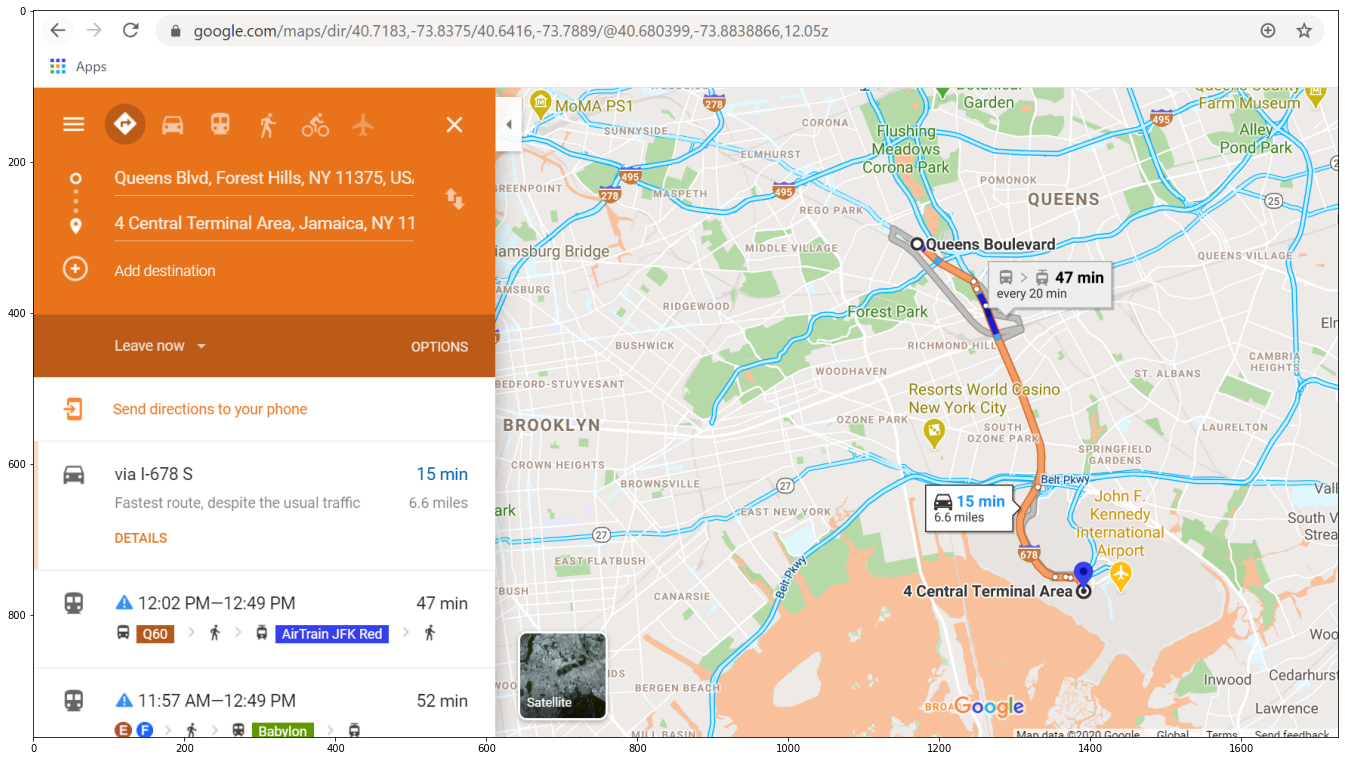

In [17]:
%matplotlib inline

import cv2
import matplotlib
from matplotlib import pyplot as plt

dpi = matplotlib.rcParams['figure.dpi']

image = cv2.imread('data/testing/testing01.png')

height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(image)
plt.show()

# Testing #02 - Outside JFK Airport

In [18]:
tmp = df.where(df['Is_at_JFK_airport'] == False).dropna().iloc[0]
link = 'https://www.google.com/maps/dir/%f,%f/%f,%f' %(tmp['Pickup_latitude'], tmp['Pickup_longitude'], tmp['Dropoff_latitude'], tmp['Dropoff_longitude'])
link

'https://www.google.com/maps/dir/40.810726,-73.952408/40.676285,-73.983940'

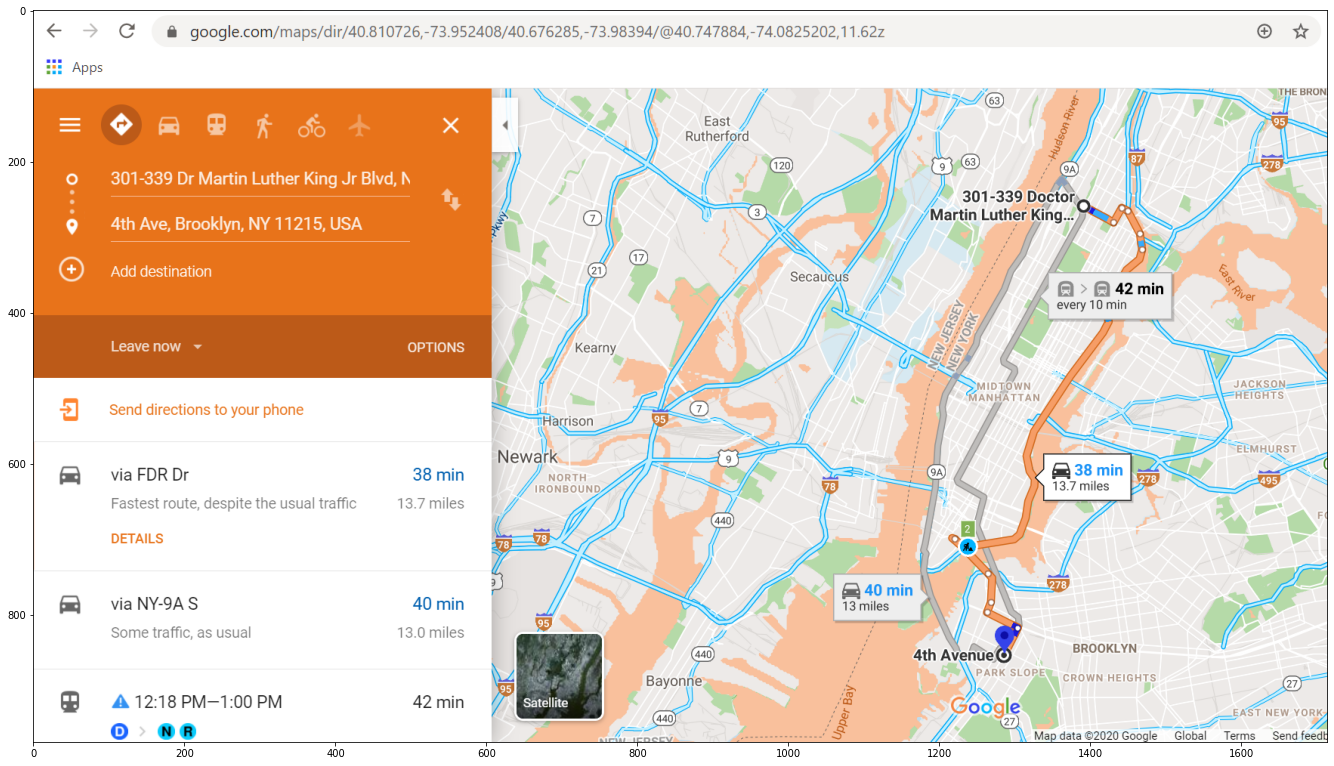

In [19]:
%matplotlib inline

import cv2
import matplotlib
from matplotlib import pyplot as plt

dpi = matplotlib.rcParams['figure.dpi']

image = cv2.imread('data/testing/testing02.png')

height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(image)
plt.show()

# Saving Result

In [20]:
import pyarrow as pa
import pyarrow.parquet as pq

table = pa.Table.from_pandas(df)
pq.write_table(table, 'data/output/%s_plus.parquet' %(FILENAME, ), coerce_timestamps='ms')

In [21]:
parquet_file = pq.ParquetFile('data/output/%s_plus.parquet' %(FILENAME, ))
parquet_file.metadata

  created_by: parquet-cpp version 1.5.1-SNAPSHOT
  num_columns: 84
  num_rows: 49647
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 42600

In [22]:
parquet_file.read_row_group(0)

pyarrow.Table
VendorID: int64
lpep_pickup_datetime: timestamp[ms]
Lpep_dropoff_datetime: timestamp[ms]
Store_and_fwd_flag: string
RateCodeID: int64
Pickup_longitude: double
Pickup_latitude: double
Dropoff_longitude: double
Dropoff_latitude: double
Passenger_count: int64
Trip_distance: double
Fare_amount: double
Extra: double
MTA_tax: double
Tip_amount: double
Tolls_amount: double
Ehail_fee: double
Total_amount: double
Payment_type: int64
Trip_type: int64
Pickup_hour_0: uint8
Pickup_hour_1: uint8
Pickup_hour_2: uint8
Pickup_hour_3: uint8
Pickup_hour_4: uint8
Pickup_hour_5: uint8
Pickup_hour_6: uint8
Pickup_hour_7: uint8
Pickup_hour_8: uint8
Pickup_hour_9: uint8
Pickup_hour_10: uint8
Pickup_hour_11: uint8
Pickup_hour_12: uint8
Pickup_hour_13: uint8
Pickup_hour_14: uint8
Pickup_hour_15: uint8
Pickup_hour_16: uint8
Pickup_hour_17: uint8
Pickup_hour_18: uint8
Pickup_hour_19: uint8
Pickup_hour_20: uint8
Pickup_hour_21: uint8
Pickup_hour_22: uint8
Pickup_hour_23: uint8
Dropoff_hour_0: uint8
D